# Telecom X - Análisis de Evasión de Clientes


## Marco teórico del proyecto

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué se practica en este desafío?

1. Importación y manipulación datos desde una API de manera eficiente.
2. Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
3. Creación de visualizaciones estratégicas para identificar patrones y tendencias.
4. Realización de un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

##📌 Extracción

Para iniciar el análisis, se necesitará importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué se debe de hacer para que se cumpla esta parte?

1. Cargar los datos directamente desde la API utilizando Python.
2. Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd

In [2]:
url_datos = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [3]:
datos_telecom = pd.read_json(url_datos)
datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
df_customer = pd.json_normalize(datos_telecom['customer'])
df_phone = pd.json_normalize(datos_telecom['phone'])
df_internet = pd.json_normalize(datos_telecom['internet'])
df_account = pd.json_normalize(datos_telecom['account'])

datos_limpios = pd.concat([datos_telecom[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##🔧 Transformación


### Conocer contenido de columnas

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

¿Qué debes hacer?
1. Explorar las columnas del dataset y verificar sus tipos de datos.
2. Consultar el diccionario para comprender mejor el significado de las variables.
3. Identificar las columnas más relevantes para el análisis de evasión.

In [5]:
columnas_numericas = [
    'Churn', 'gender', 'SeniorCitizen','Partner', 'Dependents',
    'PhoneService','InternetService', 'MultipleLines', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod', 'Contract','OnlineSecurity']

In [6]:
for columna in columnas_numericas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']
OnlineSecurity: ['No' 'Yes' 'No internet service']


### Comprobación de incoherencias en los datos
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.



In [7]:
import numpy as np

In [8]:
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].str.replace(' ', '', regex=True)
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].replace('', np.nan)
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].astype(float)
datos_limpios['Charges.Total'].isnull().sum()

np.int64(11)

In [9]:
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].fillna(0)
datos_limpios['Charges.Total'].isnull().sum()

np.int64(0)

In [10]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Manejo de inconsistencias:

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis..

In [11]:
datos_limpios = datos_limpios.query("Churn != ''")
datos_limpios = datos_limpios
datos_limpios['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003-mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month-to-month,No,mailed check,59.9,542.40
2,0004-tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.9,280.85
3,0011-igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.0,1237.85
4,0013-exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.9,267.40


In [13]:
datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))
datos_limpios['Contract'] = datos_limpios['Contract'].apply(lambda x: x.replace('-',' '))
datos_limpios.head()

<ipython-input-13-e6f06bd8b4c2>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month to month,No,mailed check,59.9,542.40
2,0004tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month to month,Yes,electronic check,73.9,280.85
3,0011igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.0,1237.85
4,0013exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,mailed check,83.9,267.40


In [14]:
datos_limpios['gender'] = datos_limpios['gender'].map({'male': 0, 'female': 1})
datos_limpios['InternetService'] = datos_limpios['InternetService'].map({'no': 0, 'dsl': 1, 'fiber optic': 2})
datos_limpios['Contract'] = datos_limpios['Contract'].map({'month to month': 0, 'one year': 1, 'two year': 2})

In [15]:
columnas_binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].replace({'Yes':1, 'No':0})

<ipython-input-15-fdaddcc84ca7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].replace({'Yes':1, 'No':0})


In [16]:
mapeo_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}
columnas_servicios = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','OnlineSecurity']

for columna in columnas_servicios:
    datos_limpios[columna] = datos_limpios[columna].map(mapeo_servicios)

In [17]:
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,0,1,1,0,1,1,mailed check,65.6,593.30
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,0,1,0,0,mailed check,59.9,542.40
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,0,0,0,0,1,electronic check,73.9,280.85
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,1,0,1,1,0,1,electronic check,98.0,1237.85
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,1,0,0,1,mailed check,83.9,267.40


In [19]:
for columna in columnas_numericas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

Churn: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
InternetService: [1 2 0]
MultipleLines: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [1 0 2]
OnlineSecurity: [0 1]


### Creacion de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [20]:
datos_limpios['Cuentas_Diarias'] = datos_limpios['Charges.Monthly'] / 30

In [21]:
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,0,1,1,mailed check,65.6,593.30,2.186667
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,1,0,0,mailed check,59.9,542.40,1.996667
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,1,0,0,0,0,1,electronic check,73.9,280.85,2.463333
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,1,0,1,electronic check,98.0,1237.85,3.266667
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,1,0,0,1,mailed check,83.9,267.40,2.796667


### Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [22]:
datos_limpios = pd.get_dummies(datos_limpios, columns=['PaymentMethod'])
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,65.6,593.30,2.186667,False,False,False,True
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,1,0,0,59.9,542.40,1.996667,False,False,False,True
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,0,1,73.9,280.85,2.463333,False,False,True,False
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,98.0,1237.85,3.266667,False,False,True,False
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,83.9,267.40,2.796667,False,False,False,True


In [23]:
datos_limpios[['PaymentMethod_mailed check',
    'PaymentMethod_bank transfer (automatic)',
      'PaymentMethod_credit card (automatic)',
      'PaymentMethod_electronic check']].sum()

,0
PaymentMethod_mailed check,1612
PaymentMethod_bank transfer (automatic),1544
PaymentMethod_credit card (automatic),1522
PaymentMethod_electronic check,2365


In [24]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

In [25]:
servicios = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'OnlineBackup', 'DeviceProtection', 'PhoneService', 'MultipleLines']


datos_limpios['ServiciosContratados'] = datos_limpios[servicios].sum(axis=1)
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,1,65.6,593.30,2.186667,False,False,False,True,4
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,59.9,542.40,1.996667,False,False,False,True,3
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,73.9,280.85,2.463333,False,False,True,False,2
3,0011igkff,1,0,1,1,0,13,1,0,2,...,0,1,98.0,1237.85,3.266667,False,False,True,False,5
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,83.9,267.40,2.796667,False,False,False,True,3


In [26]:
datos_limpios['ServiciosContratados'].sample(20)

,ServiciosContratados
2415,1
2579,1
5337,6
5949,3
6941,2
2012,1
3919,3
7213,4
3003,2
3286,2


#📊 Carga y análisis

### Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

In [27]:
datos_limpios.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,ServiciosContratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,...,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,64.761692,2279.734304,2.158723,3.362914
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,...,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,30.090047,2266.794470,1.003002,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.750000,8684.800000,3.958333,8.000000


### Distribución de evasión (Clientes que cancelaron vs no)

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

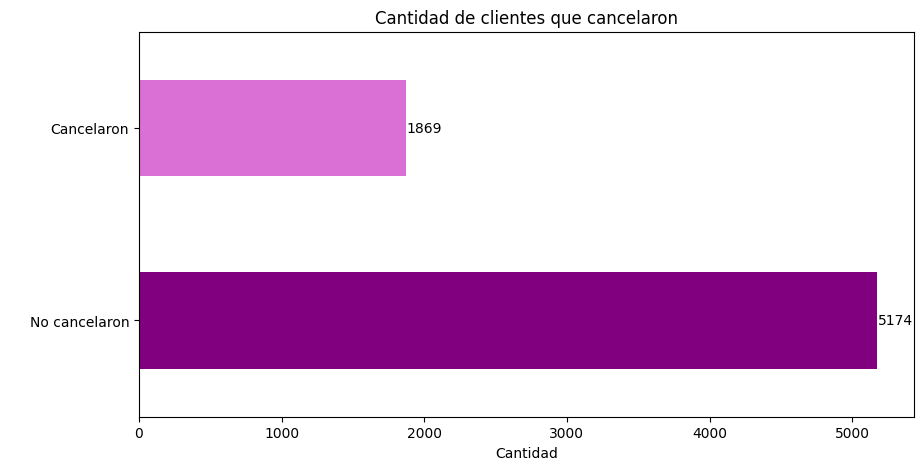

In [29]:
conteo = datos_limpios['Churn'].value_counts().rename(index={0: 'No cancelaron', 1: 'Cancelaron'})

fig, ax = plt.subplots(figsize=(10,5))
conteo.plot(kind='barh', ax=ax, color=['purple','orchid'])
plt.title('Cantidad de clientes que cancelaron')
ax.set_xlabel('Cantidad')
ax.set_ylabel(' ')

# Mostrar los números al lado de cada barra
for i, (valor) in enumerate(conteo):
    ax.text(valor + 5, i, str(valor), color='black', fontsize=10, va='center')

fig.savefig('distribucion_cancelacion.png',transparent=False,dpi=300,bbox_inches='tight')

plt.show()

### Evasión de clientes según Genero, Servicio de Internet, Tipo de contrato

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

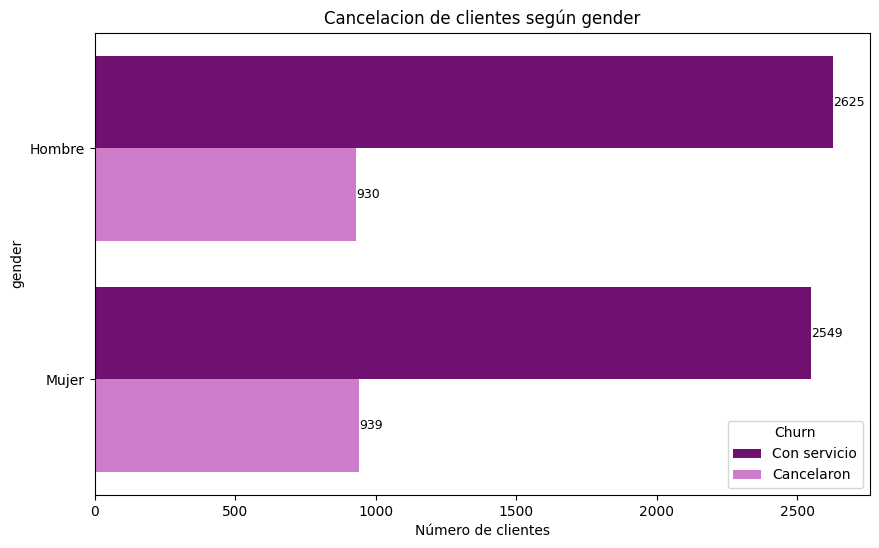


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



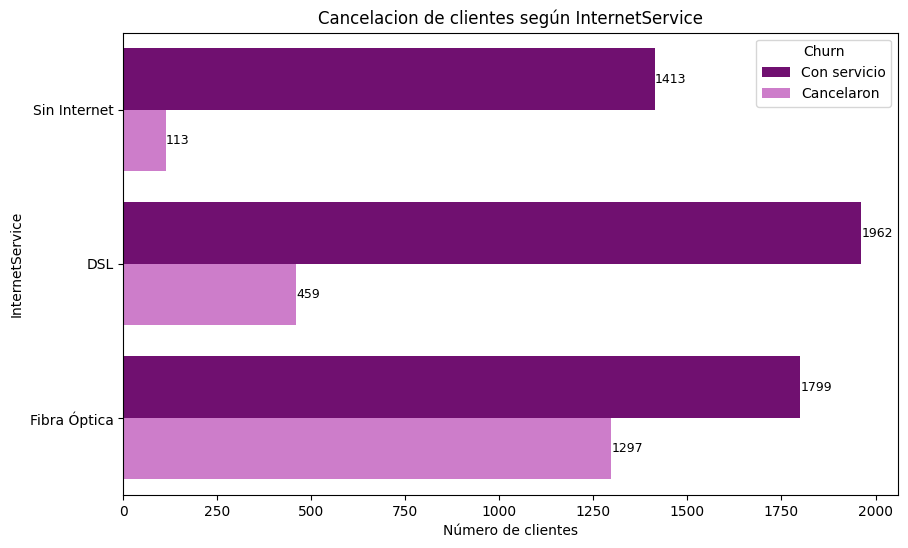


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



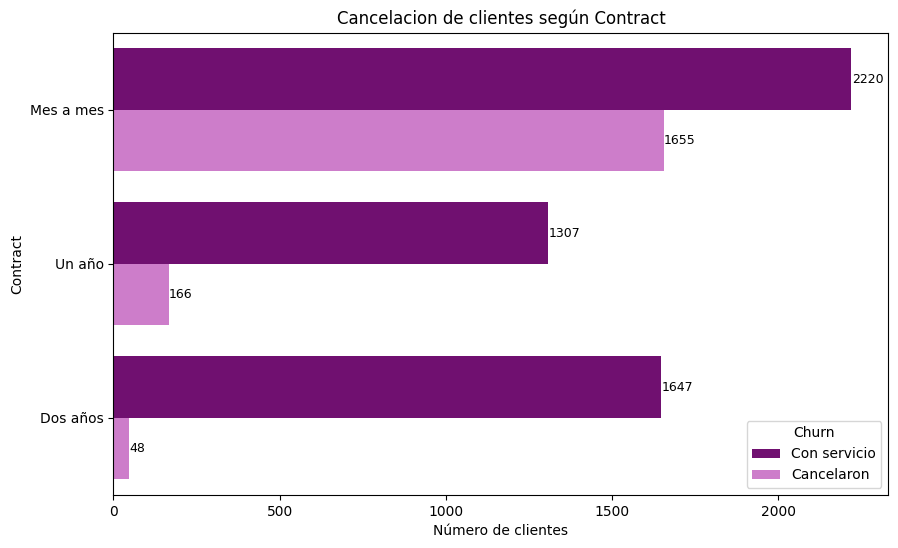


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [30]:
def plot_churn_by_category(column, labels_dict=None):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(data=datos_limpios, y=column, hue='Churn', ax=ax, palette=['purple','orchid'])
    ax.set_title(f'Cancelacion de clientes según {column}')
    ax.set_xlabel('Número de clientes')
    ax.set_ylabel(column)
    ax.legend(title='Churn', labels=['Con servicio', 'Cancelaron'])

    if labels_dict:
        unique_vals = sorted(datos_limpios[column].unique())
        ax.set_yticks(unique_vals)
        ax.set_yticklabels([labels_dict[val] for val in unique_vals])

    for a in ax.patches:
      width = a.get_width()
      if width > 0:
          ax.text(width + 1, a.get_y() + a.get_height() / 2, int(width), va='center', fontsize=9, color='black')
    fig.savefig(f'{column}.png',transparent=False,dpi=300,bbox_inches='tight')
    plt.show()
    print('\n' + '-'*180 + '\n')

labels_gender = {0: 'Hombre', 1: 'Mujer'}
labels_internet = {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra Óptica'}
labels_contract = {0: 'Mes a mes', 1: 'Un año', 2: 'Dos años'}

plot_churn_by_category('gender', labels_gender)
plot_churn_by_category('InternetService', labels_internet)
plot_churn_by_category('Contract', labels_contract)

### Cantidad de clientes que cancelaron por método de pago


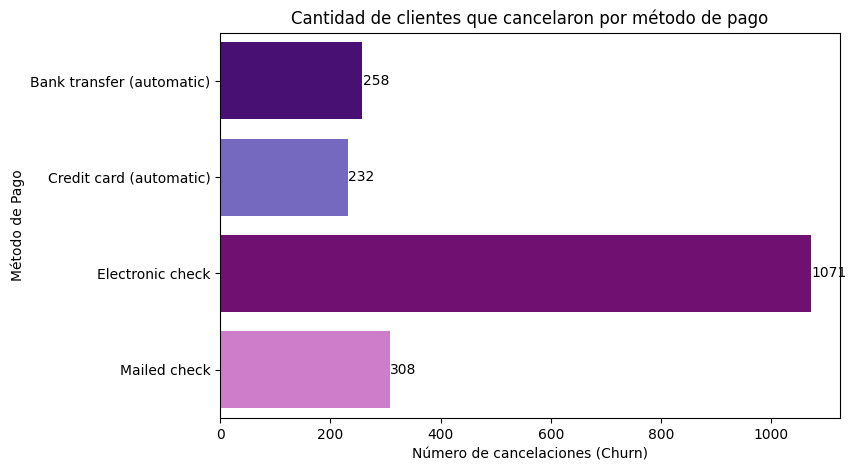

In [33]:
payment_churn = {
    'Bank transfer (automatic)': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_bank transfer (automatic)'].sum(),
    'Credit card (automatic)': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_credit card (automatic)'].sum(),
    'Electronic check': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_electronic check'].sum(),
    'Mailed check': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_mailed check'].sum()
}
df_churn = pd.DataFrame(payment_churn.items(), columns=['Método', 'Cancelaciones'])

plt.figure(figsize=(8,5))
sns.barplot(
    x='Cancelaciones',
    y='Método',
    hue='Método',
    data=df_churn,
    orient='h',
    palette=['indigo','slateblue','purple','orchid'],
    legend=False
)

for i, v in enumerate(df_churn['Cancelaciones']):
    plt.text(v+1, i, int(v), va='center')

plt.title('Cantidad de clientes que cancelaron por método de pago')
plt.xlabel('Número de cancelaciones (Churn)')
plt.ylabel('Método de Pago')

fig = plt.gcf()
fig.savefig('cancelaciones_por_metodo.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

#### Distribución de Cargos Totales por Cancelación

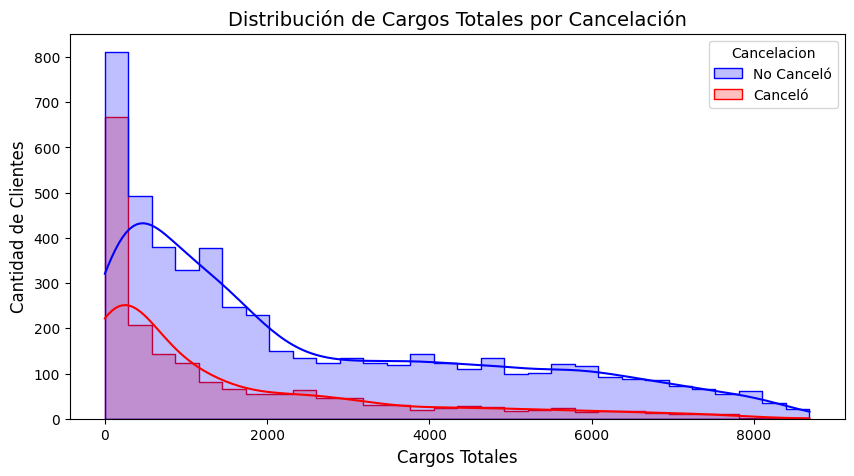

In [33]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='Charges.Total', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de Cargos Totales por Cancelación', fontsize=14)
ax.set_xlabel('Cargos Totales', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_cargos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Distribución de meses por Cancelación

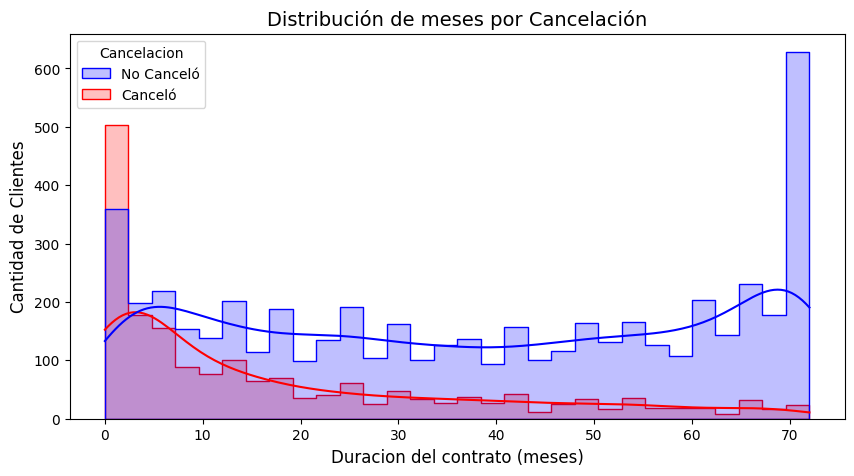

In [34]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='tenure', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de meses por Cancelación', fontsize=14)
ax.set_xlabel('Duracion del contrato (meses)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_meses.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Distribución de dias por Cancelación

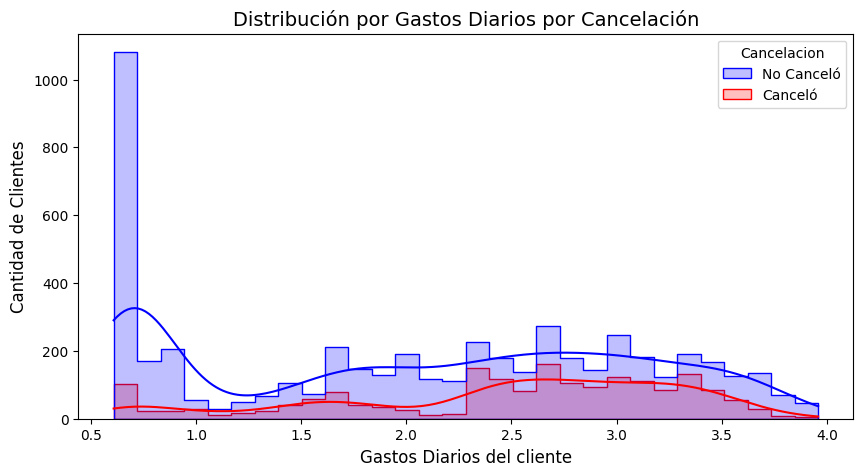

In [35]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='Cuentas_Diarias', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución por Gastos Diarios por Cancelación', fontsize=14)
ax.set_xlabel('Gastos Diarios del cliente', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_porDias_gastos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Relacion de servicio de internet y Tipo de contrato

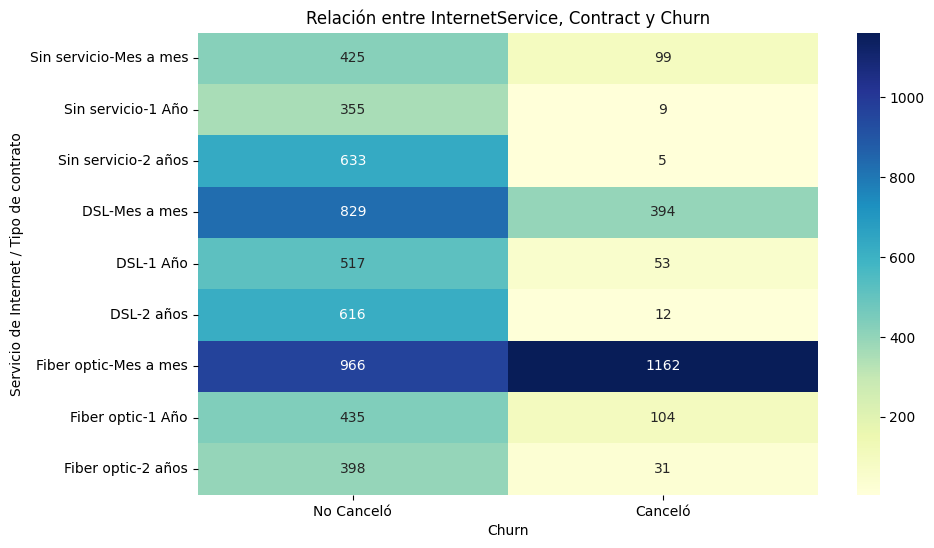

In [36]:
internet_labels = {0: 'Sin servicio', 1: 'DSL', 2: 'Fiber optic'}
contract_labels = {0: 'Mes a mes', 1: '1 Año', 2: '2 años'}
churn_labels = {0:'No Canceló', 1: 'Canceló'}

tabla = pd.crosstab(
    [datos_limpios['InternetService'], datos_limpios['Contract']],
    datos_limpios['Churn']
)

tabla.index = pd.MultiIndex.from_tuples(
    [(internet_labels[i], contract_labels[c]) for i, c in tabla.index],
    names=['InternetService', 'Contract']
)

tabla.rename(columns=churn_labels, inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre InternetService, Contract y Churn')
plt.ylabel('Servicio de Internet / Tipo de contrato')
plt.xlabel('Churn')
plt.savefig('relacion_internet_contract_churn.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Relación entre número de "servicios contratados" y "cancelación"

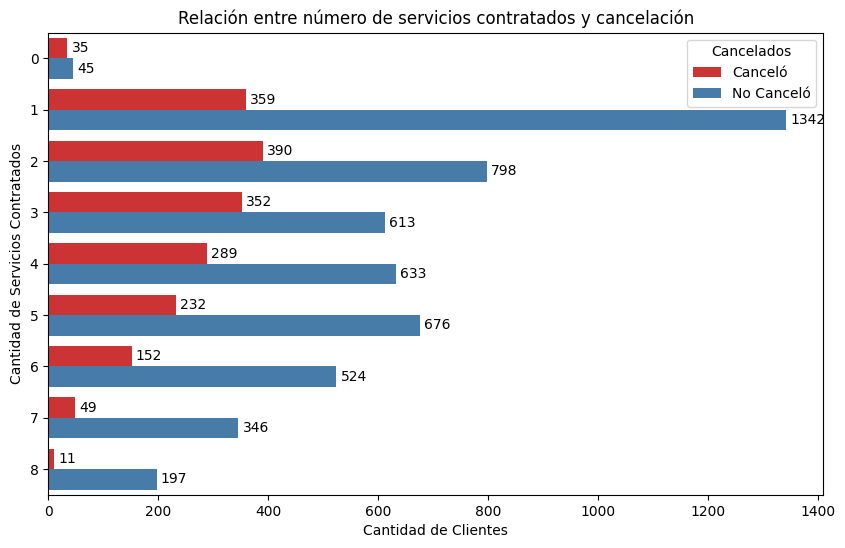

In [37]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=datos_limpios, y='ServiciosContratados', hue='Cancelacion', palette='Set1')

plt.title('Relación entre número de servicios contratados y cancelación')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Cantidad de Servicios Contratados')
plt.legend(title='Cancelados')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)
plt.savefig('servicios_contratados_cancelados.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

#📄Informe final

### Introducción
La empresa Telecom X enfrenta una alta tasa de cancelaciones de clientes, lo que impacta sus ingresos y estabilidad en el mercado. Este análisis tiene como objetivo comprender los factores que influyen en la evasión (Churn), identificando patrones y tendencias en los datos históricos de clientes. A través de un proceso de limpieza, transformación y exploración, buscamos obtener insights clave para reducir la cancelación y mejorar la retención.

### Limpieza y Tratamiento de Datos
Para garantizar la calidad de los datos y facilitar el análisis, se realizaron los siguientes pasos:

- Extracción: Se obtuvieron los datos desde la API de Telecom X en formato JSON y se transformaron en un DataFrame.

- Transformación: Se limpiaron inconsistencias, eliminando espacios en blanco, normalizando texto y convirtiendo valores categóricos en formato numérico.

- Estandarización: Se renombraron columnas y se estructuraron variables binarias (Sí y No → 1 y 0) para mejorar el procesamiento.

Ejemplo de conversión de datos:

`datos_limpios['EstadoCancelacion'] = datos_limpios['Churn'].replace({'Yes': 1, 'No': 0})`

### Análisis Exploratorio de Datos
El análisis exploratorio nos permitió comprender mejor el comportamiento de los clientes. Se visualizaron métricas clave como:

- Distribución de Evasión: Se analizó la proporción de clientes que cancelaron vs. los que permanecieron.

- Evasión según características: Se exploró el impacto del género, tipo de contrato y método de pago en la cancelación.

- Tendencias numéricas: Se analizó la relación entre cantidad gastada, duración del contrato y la evasión.

Ejemplo de distribución de cancelaciones:

conteo = datos_limpios['EstadoCancelacion'].value_counts()
conteo.plot(kind='bar', color=['blue', 'red'])
plt.title('Clientes que cancelaron vs. no cancelaron')
plt.show()

```
# Tiene formato de código
```

### Conclusiones e Insights
A partir del análisis, se identificaron varios hallazgos clave:

- Los clientes con contratos mensuales tienen mayor tendencia a cancelar.

- Los usuarios con servicios de Fibra Óptica presentan una menor tasa de cancelación en comparación con DSL.

- Los métodos de pago Electronic Check tienen mayor evasión que tarjetas de crédito o transferencias automáticas.

Estos insights pueden ayudar a la empresa a ajustar estrategias de retención, focalizándose en segmentos específicos.

### Recomendaciones
Con base en los datos obtenidos, se sugieren las siguientes estrategias para reducir la evasión:
- Implementar descuentos o beneficios para clientes con contratos mensuales, incentivando su fidelización.
- Mejorar el servicio en DSL para equiparar la satisfacción con Fibra Óptica.
- Ofrecer incentivos a los clientes que utilizan Electronic Check para que migren a métodos de pago más estables.
- Realizar campañas personalizadas según el perfil de clientes con mayor probabilidad de cancelación.




### ¡Extra! Análisis de correlación entre variables

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:
- La relación entre la cuenta diaria y la evasión.
- Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

In [39]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

In [41]:
datos_limpios["Cancelacion"] = datos_limpios["Cancelacion"].map({"No Canceló": 0, "Canceló": 1})
print(datos_limpios.select_dtypes(include=["object"]).head())

  customerID
0  0002orfbo
1  0003mknfe
2  0004tlhlj
3  0011igkff
4  0013exchz


In [43]:
datos_limpios["Cancelacion"] = pd.to_numeric(datos_limpios["Cancelacion"], errors="coerce")

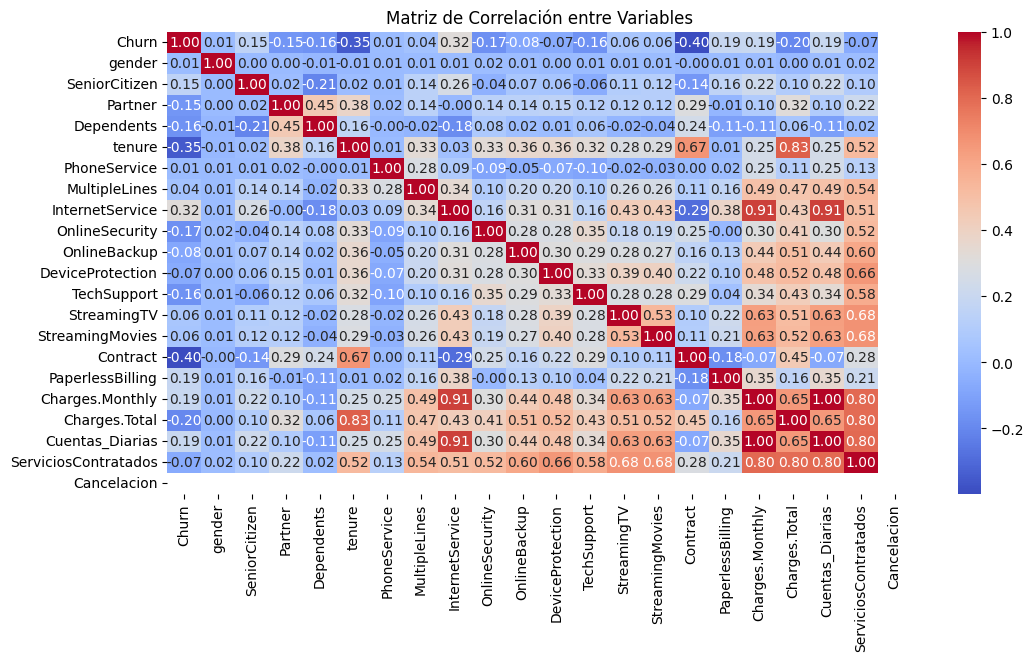

In [45]:
# Filtrar solo las columnas numéricas
datos_numericos = datos_limpios.select_dtypes(include=["number"])

# Calcular la matriz de correlación
correlaciones = datos_numericos.corr()

# Visualizar con un mapa de calor
plt.figure(figsize=(12,6))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables")
plt.show()


In [49]:
print("Correlación entre Cuentas_Diarias y EstadoCancelacion:")
print(datos_limpios.columns)

Correlación entre Cuentas_Diarias y EstadoCancelacion:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias', 'PaymentMethod_bank transfer (automatic)',
       'PaymentMethod_credit card (automatic)',
       'PaymentMethod_electronic check', 'PaymentMethod_mailed check',
       'ServiciosContratados', 'Cancelacion', 'EstadoCancelacion'],
      dtype='object')


In [53]:
datos_limpios["EstadoCancelacion"] = datos_limpios["Churn"].map({0: "No Canceló", 1: "Canceló"})
datos_limpios["EstadoCancelacion"] = datos_limpios["EstadoCancelacion"].map({"No Canceló": 0, "Canceló": 1})
datos_numericos = datos_limpios.select_dtypes(include=["number"])
correlaciones = datos_numericos.corr()
print(datos_limpios[['Cuentas_Diarias', 'Cancelacion']].corr())
print(datos_limpios[['Cuentas_Diarias', 'EstadoCancelacion']].corr())

                 Cuentas_Diarias  Cancelacion
Cuentas_Diarias              1.0          NaN
Cancelacion                  NaN          NaN
                   Cuentas_Diarias  EstadoCancelacion
Cuentas_Diarias           1.000000           0.193356
EstadoCancelacion         0.193356           1.000000


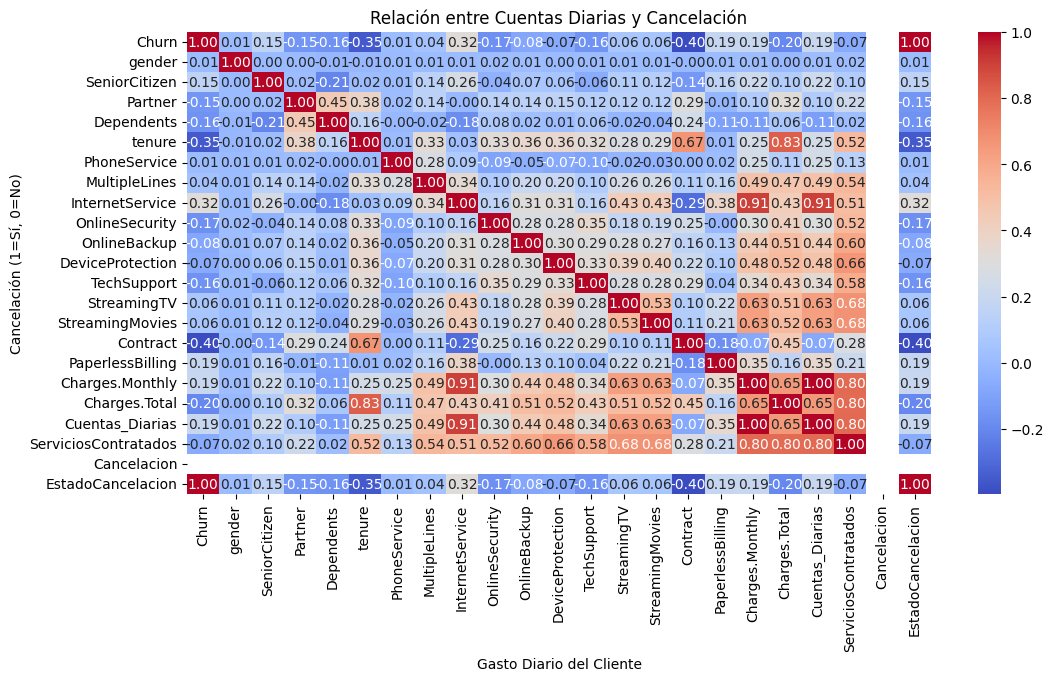

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Relación entre Cuentas Diarias y Cancelación")
plt.xlabel("Gasto Diario del Cliente")
plt.ylabel("Cancelación (1=Sí, 0=No)")
plt.show()